In [11]:
import numpy as np 

y = np.loadtxt('/home/aditya/Documents/UIUC/spring_2016/STAT427/project/uci_har_dataset/test/y_test.txt')
x = np.loadtxt('/home/aditya/Documents/UIUC/spring_2016/STAT427/project/uci_har_dataset/test/X_test.txt')

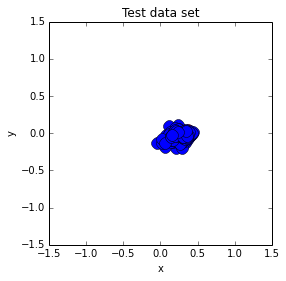

In [13]:
import matplotlib.pyplot as pyplot

%matplotlib inline

def plot_data(features,labels,axis,alpha=1.0):
    # separate features according to their class
    X0,X1,X2 = features[labels==0], features[labels==1], features[labels==2]
    
    # class 0 data
    axis.plot(X0[:,0], X0[:,1], 'o', color='green', markersize=12, alpha=alpha)
    # class 1 data
    axis.plot(X1[:,0], X1[:,1], 'o', color='red', markersize=12, alpha=alpha)
    # class 2 data
    axis.plot(X2[:,0], X2[:,1], 'o', color='blue', markersize=12, alpha=alpha)
    
    # set axes limits
    axis.set_xlim(-1.5,1.5)
    axis.set_ylim(-1.5,1.5)
    axis.set_aspect('equal')
    
    axis.set_xlabel('x')
    axis.set_ylabel('y')

figure,axis = pyplot.subplots(1,1)
plot_data(x,y,axis)
axis.set_title('Test data set')
pyplot.show()

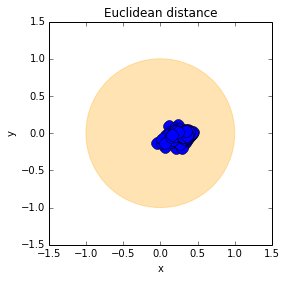

In [14]:
def make_covariance_ellipse(covariance):
    import matplotlib.patches as patches
    import scipy.linalg       as linalg
    
    # the ellipse is centered at (0,0)
    mean = numpy.array([0,0])
    
    # eigenvalue decomposition of the covariance matrix (w are eigenvalues and v eigenvectors),
    # keeping only the real part
    w,v = linalg.eigh(covariance)
    # normalize the eigenvector corresponding to the largest eigenvalue
    u = v[0]/linalg.norm(v[0])
    # angle in degrees
    angle = 180.0/numpy.pi*numpy.arctan(u[1]/u[0])
    # fill Gaussian ellipse at 2 standard deviation
    ellipse = patches.Ellipse(mean, 2*w[0]**0.5, 2*w[1]**0.5, 180+angle, color='orange', alpha=0.3)
    
    return ellipse

# represent the Euclidean distance
figure,axis = pyplot.subplots(1,1)
plot_data(x,y,axis)
ellipse = make_covariance_ellipse(numpy.eye(2))
axis.add_artist(ellipse)
axis.set_title('Euclidean distance')
pyplot.show()

In [9]:
from modshogun import RealFeatures, MulticlassLabels

features = RealFeatures(x.T)
labels   = MulticlassLabels(y.astype(numpy.float64))



ImportError: No module named modshogun

In [ ]:
from modshogun import LMNN

# number of target neighbours per example
k = 1

lmnn = LMNN(features,labels,k)
# set an initial transform as a start point of the optimization
init_transform = numpy.eye(2)
lmnn.set_maxiter(2000)
lmnn.train(init_transform)